In [ ]:
# !pip3 install geopandas
# !pip3 install xgboost
# !pip3 install imblearn

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [3]:
df = pd.read_csv('alpha_clean.csv').drop(columns=["Unnamed: 0"], axis=1)
df

,ad_exp,sns,price,marital,education,income,age,prime,sale_quarter
0,0.000000,0,4,1,3,4,4,0,4
1,0.000000,0,7,1,3,5,4,1,4
2,0.000000,0,1,2,3,2,1,1,4
3,0.000000,0,3,2,2,5,3,1,4
4,0.000000,0,3,1,1,5,4,1,4
...,...,...,...,...,...,...,...,...,...
2798,0.770202,0,3,2,0,2,4,1,3
2799,0.770202,0,3,0,0,2,5,1,3
2800,0.000000,0,4,2,2,5,3,0,3
2801,1.000000,0,1,2,0,2,2,1,3


Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean

X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
reg = LinearRegression().fit(X_train, y_train)
sqrt(mean((y_test - reg.predict(X_test))**2))

0.4143343338897112

In [7]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=100)
rf = regr.fit(X_train, y_train)
sqrt(mean((y_test - rf.predict(X_test))**2))

0.41336120176248875

In [8]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.4s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=1, m

/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/User

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 1,
 'bootstrap': False}

In [9]:
regr = RandomForestRegressor(min_samples_leaf = 15, max_features = 'sqrt', max_depth = 4, random_state=100)
rf = regr.fit(X_train, y_train)
sqrt(mean((y_test - rf.predict(X_test))**2))

0.4133267114553054

In [10]:
pd.DataFrame(data = {"true": y_test, "predict": rf.predict(X_test)})

,true,predict
995,0.000000,0.516283
2557,0.481061,0.495689
973,0.000000,0.518139
510,0.000000,0.505994
1583,0.481061,0.521490
...,...,...
2646,0.000000,0.501665
815,1.000000,0.503033
1107,0.000000,0.471278
773,0.000000,0.514351


In [11]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)


In [12]:
X_train = lab.fit_transform(X_train)

ValueError: y should be a 1d array, got an array of shape (2242, 8) instead.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC

clf = SVC(kernel='poly', degree=2)

svc = clf.fit(X_train, y_train)
sqrt(mean((y_test - svc.predict(X_test))**2))

1.5757808568623546

In [14]:
clf = SVC(kernel='linear')
svc = clf.fit(X_train, y_train)
sqrt(mean((y_test - svc.predict(X_test))**2))

0.6950984330709228

In [16]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=100, n_estimators=30)
xgb_model.fit(X_train, y_train)
sqrt(mean((y_test - xgb_model.predict(X_test))**2))

2.343774937346564

Text(0.5, 0, 'Permutation Importance')

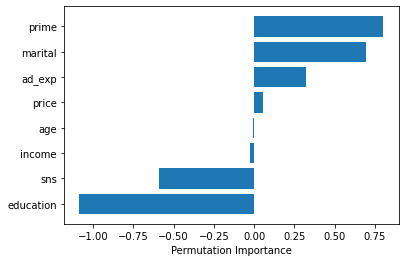

In [17]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=10)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

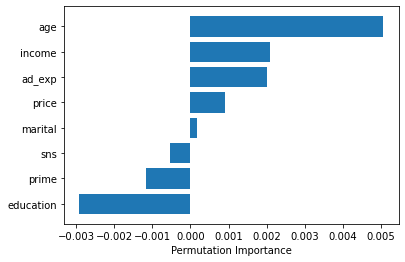

In [18]:
perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Classification

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean

X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = [1 if i > 0.5 else 0 for i in y_train]
y_test = [1 if i > 0.5 else 0 for i in y_test]

In [22]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, [int(i) for i in y_train])

In [23]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=100).fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.49376114081996436

In [24]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.score(X_test, y_test)

0.4919786096256685

In [25]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.score(X_test, y_test)

0.5098039215686274

In [26]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.score(X_test, y_test)

0.483065953654189

In [27]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.score(X_test, y_test)

0.5062388591800356

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.score(X_test, y_test)

0.5026737967914439

In [29]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.score(X_test, y_test)

0.5311942959001783

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.5s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   1.0s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   1.8s
[CV] END bootstrap=True, max_depth=1, max

[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   1.3s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   1.7s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, 

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.5s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.4s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=False, max_depth=None,

Text(0.5, 0, 'Permutation Importance')

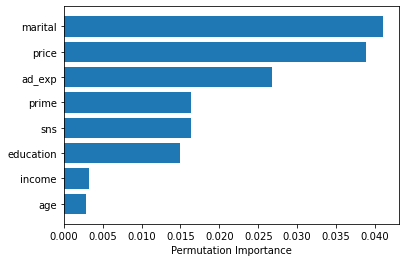

In [30]:
perm_importance = permutation_importance(grid_result, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [31]:
perm_importance.importances_mean[sorted_idx]

array([0.00285205, 0.00320856, 0.01497326, 0.01639929, 0.01639929,
       0.02673797, 0.03885918, 0.04099822])

In [57]:
data = pd.read_csv("dog_food_clean.csv").drop(columns=["Unnamed: 0"], axis=1)

In [58]:
data

,ad_exp,sns,product_brand,price,marital,education,income,age,prime,sale_quarter
0,Don't recall seeing an ad,0,Alpha,4,1,3,4,4,0,4
1,Don't recall seeing an ad,1,Arf,0,1,1,5,3,1,4
2,Don't recall seeing an ad,0,Bezt,0,1,0,5,3,1,4
3,Don't recall seeing an ad,0,Alpha,7,1,3,5,4,1,4
4,Don't recall seeing an ad,0,Alpha,1,2,3,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...
8889,Sponsored Brands,0,Alpha,1,2,0,2,2,1,3
8890,Don't recall seeing an ad,0,Bezt,4,1,0,1,1,1,3
8891,Sponsored Brands,0,Bezt,1,1,0,0,1,1,3
8892,Don't recall seeing an ad,0,K99,6,2,0,1,3,1,3


In [59]:
l = []
for i in data['ad_exp']:
    if i == "Don't recall seeing an ad":
        l.append(0) 
    else:
        l.append(1)  

In [60]:
1

1

In [61]:
data['ad'] = l

In [63]:
data.drop(columns = ['ad_exp'], inplace = True)

In [64]:
data

,sns,product_brand,price,marital,education,income,age,prime,sale_quarter,ad
0,0,Alpha,4,1,3,4,4,0,4,0
1,1,Arf,0,1,1,5,3,1,4,0
2,0,Bezt,0,1,0,5,3,1,4,0
3,0,Alpha,7,1,3,5,4,1,4,0
4,0,Alpha,1,2,3,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...
8889,0,Alpha,1,2,0,2,2,1,3,1
8890,0,Bezt,4,1,0,1,1,1,3,0
8891,0,Bezt,1,1,0,0,1,1,3,1
8892,0,K99,6,2,0,1,3,1,3,0
